In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from check_binary_mask import check_binary_mask
from check_binary_mask import number_to_type_layer
from check_binary_mask import type_layer_to_number

In [2]:
T = 3
L = 2
total_nodes = T * L

nodes = {}
types = {0: "Dense", 1: "Conv1D", 
         2: "LSTM", 3: "BiLSTM", 4: "GlobMaxPool1D", 
         5: "MaxPool1D",  6: "Attention"}

for i in range(0, total_nodes):
    nodes[i] = types[number_to_type_layer(i, T)[1]]

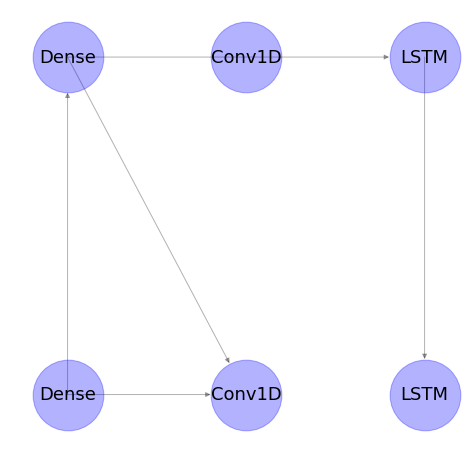

In [3]:
cm = np.zeros((total_nodes, total_nodes)) 
cm[0, 1] = 1
cm[0, 3] = 1
cm[3, 1] = 1
cm[3, 5] = 1
cm[5, 2] = 1

dg = nx.DiGraph()

for i in range(total_nodes):
    dg.add_node(i)
    
pos = {}

for i in range(total_nodes):
    for j in range(total_nodes):
        if cm[i,j] == 1:
            dg.add_edge(i, j)
#     pos[i] = 5 * np.array(number_to_type_layer(i, L, T))
    pos[i] = np.array(number_to_type_layer(i,  T))[::-1]

plt.figure(figsize=(6, 6))
nx.draw(dg, pos, node_color='b', node_size=5000, alpha=0.3)

nx.draw_networkx_labels(dg, pos, nodes, font_size=18)
plt.show()

In [ ]:
check_binary_mask(nodes, cm)

In [ ]:
def get_graph_and_plot(nodes, cm):
    total_nodes = len(nodes)
    dg = nx.DiGraph()

    for i in range(total_nodes):
        dg.add_node(i)

    pos = {}

    for i in range(total_nodes):
        for j in range(total_nodes):
            if cm[i,j] == 1:
                dg.add_edge(i, j)
    #     pos[i] = 5 * np.array(number_to_type_layer(i, L, T))
        pos[i] = np.array(number_to_type_layer(i, T))[::-1]

    plt.figure(figsize=(6, 6))
    nx.draw(dg, pos, node_color='b', node_size=5000, alpha=0.3)

    nx.draw_networkx_labels(dg, pos, nodes, font_size=18)
    plt.show()

In [ ]:
cm = np.zeros((total_nodes, total_nodes)) 
cm[0, 1] = 1
cm[0, 3] = 1
cm[3, 1] = 1
cm[3, 5] = 1
cm[5, 2] = 1
cm[5, 3] = 1

get_graph_and_plot(nodes, cm)
_, new_cm = check_binary_mask(nodes, cm)
get_graph_and_plot(nodes, new_cm)

In [ ]:
dg = nx.DiGraph()

In [ ]:
for i in range(6):
    dg.add_node(i)

In [ ]:
dg.add_edge(0, 1)
dg.add_edge(0, 3)
dg.add_edge(3, 1)
dg.add_edge(5, 2)
dg.add_edge(3, 5)
dg.add_edge(5, 3)

In [ ]:
dg.edges()

In [ ]:
dg.remove_edge(3, 5)

In [ ]:
dg.edges()